<a href="https://colab.research.google.com/github/cpchathura/ML-Capstone/blob/main/Telco_CHURN_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telco CHURN Prediction

#1: Problem Definition








#2: Data Collection

In [438]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

data = pd.read_csv("https://raw.githubusercontent.com/cpchathura/ML-Capstone/main/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

#3: Exploratory Data Analysis (EDA)

##3.1: Understand Data

3.1.1: Analysis of data frame for its features (Columns) & data entries (Rows)

In [439]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


3.1.2: Analysis of data frame composition; shape (i.e. entries, columns), data types & memory usage. ( Alternatively can use data.shape & data.dtypes )


In [440]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


3.1.3: Statistical analysis of data frame.

In [441]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,9618-LFJRU,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3.1.4: Analysis of unique values for each feature

In [442]:
def unique_values(df):
  for column in df:
   print(f'{column} : {df[column].unique()} Count : {df[column].nunique()}\n')

In [443]:
unique_values(data)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] Count : 7043

gender : ['Female' 'Male'] Count : 2

SeniorCitizen : [0 1] Count : 2

Partner : ['Yes' 'No'] Count : 2

Dependents : ['No' 'Yes'] Count : 2

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] Count : 73

PhoneService : ['No' 'Yes'] Count : 2

MultipleLines : ['No phone service' 'No' 'Yes'] Count : 3

InternetService : ['DSL' 'Fiber optic' 'No'] Count : 3

OnlineSecurity : ['No' 'Yes' 'No internet service'] Count : 3

OnlineBackup : ['Yes' 'No' 'No internet service'] Count : 3

DeviceProtection : ['No' 'Yes' 'No internet service'] Count : 3

TechSupport : ['No' 'Yes' 'No internet service'] Count : 3

StreamingTV : ['No' 'Yes' 'No internet service'] Count : 3

StreamingMovies : ['No' 'Yes' 'No inte

3.1.5: Feature analysis based on Unique values

> a) Cx Demographic Information

*   CustomerID - Customer ID
*   Gender - Whether the customer is a male or a female
*   SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
*   Partner - Whether the customer has a partner or not (Yes, No)
*   Dependents - Whether the customer has dependents or not (Yes, No)

> b) Cx Account Information

*   Tenure - Number of months the customer has stayed with the company
*   Contract - The contract term of the customer (Month-to-month, One year, Two year)
*   PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
*   PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   MonthlyCharges - The amount charged to the customer monthly
*   TotalCharges - The total amount charged to the customer

> c) Cx Value Added Services (VAS) Subsribed

*   PhoneService - Whether the customer has a phone service or not (Yes, No)
*   MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
*   InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
*   OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
*   OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
*   DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
*   TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
*   StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
*   StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

> d) Classification Labels

*   Churn - Whether the customer churned or not (Yes, No)

##3.2: Data Preprocessing for EDA

3.2.1: Change the data type of 'TotalCharges' from 'Object' to 'float'.

In [444]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

3.2.2: Analyse missing values for each feature

In [445]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3.2.3: Data Cleaning

In [446]:
# Drop rows with missing values.
data = data.dropna()

In [447]:
data['TotalCharges'].isna().sum()

0

##3.3: Data Exploration 

3.3.1: Analyse Churn distribution

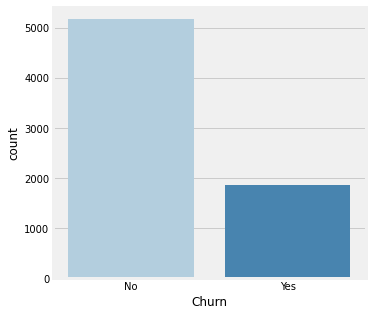

In [448]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=data['Churn'], palette="Blues", linewidth=1)
plt.show()

Figure shows imbalance of Churn vs Non-Churn customers. 

3.3.2: Analyse Box Plot to check Median & out-liers 

In [449]:
#data['tenure'].plot(kind='box')
# Create a function to generate boxplots.

def boxplot(x, y, df):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)
        
    return plt.show()

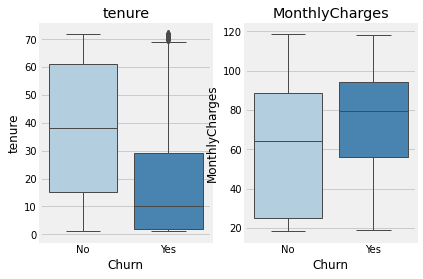

In [450]:
# Generate boxplots for tenure, MonthlyCharges and TotalCharges.
boxplot("Churn", ["tenure", "MonthlyCharges"], data)

Plot insights:
* Customers who churned had much lower tenure with a median of 10 months & much lower inter quartile range (IQR) as compared to non-churners. (median of 38 months)
* Customers who churned had higher monthly charges with a median of 80 USD and much lower IQR compared to that of non-churners (median of 65 USD).
* TotalCharges are the result of tenure and MonthlyCharges, which are more insightful on an individual basis.

3.3.3: Analyse Count Plots 

In [451]:
# Create a function to generate countplots:
def countplot(x, y, df1):
    
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    
    plt.figure(figsize=(7*columns, 7*rows))
    
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df1, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)
        
    return plt.show()

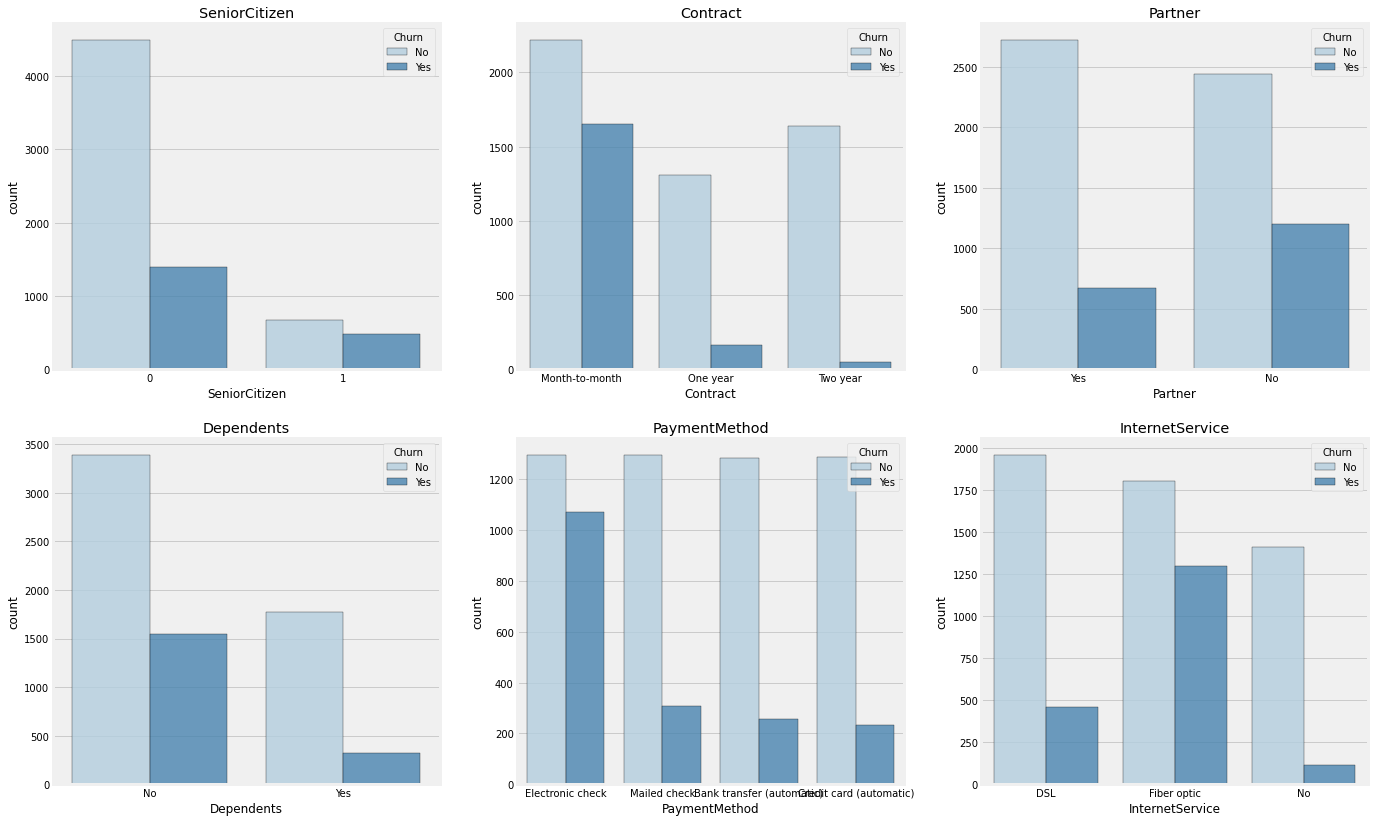

In [452]:
# Generate countplots for various features.

countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], data)

Plot insights:

* Senior citizens churn rate is much higher than non-senior churn rate.
* Churn rate for month-to-month contracts much higher that for other contract durations.
* Moderately higher churn rate for customers without partners.
* Much higher churn rate for customers without children.
* Payment method electronic check shows much higher churn rate than other payment methods.
* Customers with InternetService fiber optic as part of their contract have much higher churn rate.

#4: Feature Engineering

##4.1: Feature Selection 

4.1.1: Drop non value adding features 

In [453]:
#Drop customerID
data.drop('customerID', axis=1, inplace=True)

In [454]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


4.1.2: Add new feature : Add 'TotVAS' by summing up all add-on services subscribed. 

In [455]:
data['TotVAS'] = (data[['InternetService', 'OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


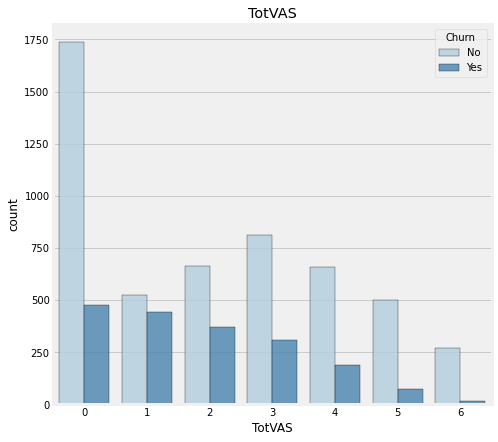

In [457]:
# Generate countplot for the new feature.
countplot('Churn', ['TotVAS'], data)

Plot insights:

* Customers with a very high number of additional value added services(VAS) do have a low churn rate.

4.1.3: Normalize Unique Values

In [458]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [459]:
unique_values(data)

gender : ['Female' 'Male'] Count : 2

SeniorCitizen : [0 1] Count : 2

Partner : ['Yes' 'No'] Count : 2

Dependents : ['No' 'Yes'] Count : 2

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] Count : 72

PhoneService : ['No' 'Yes'] Count : 2

MultipleLines : ['No' 'Yes'] Count : 2

InternetService : ['DSL' 'Fiber optic' 'No'] Count : 3

OnlineSecurity : ['No' 'Yes'] Count : 2

OnlineBackup : ['Yes' 'No'] Count : 2

DeviceProtection : ['No' 'Yes'] Count : 2

TechSupport : ['No' 'Yes'] Count : 2

StreamingTV : ['No' 'Yes'] Count : 2

StreamingMovies : ['No' 'Yes'] Count : 2

Contract : ['Month-to-month' 'One year' 'Two year'] Count : 3

PaperlessBilling : ['Yes' 'No'] Count : 2

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] Count : 4

MonthlyCharges : 

4.1.4: Label Encording ( Apply for features with 2 unique values)

In [460]:
# Label encoding for identified columns. (Instead of map can also use replace )

def label_encoding(features, df):
    for col in features:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    return       

label_encoding(['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'], data)

data['gender'] = data['gender'].map({'Female': 1, 'Male': 0})

4.1.5: One Hot Encording ( Apply for features with more than 2 unique values )

In [461]:
data = pd.get_dummies(data, columns=['InternetService','Contract','PaymentMethod'])
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'TotVAS',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [462]:
data.shape

(7032, 28)

4.1.6: Feature Rescalling: Mis-Max Scaling

In [463]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [464]:
#Reconfirm Unique values
unique_values(data)

gender : [1 0] Count : 2

SeniorCitizen : [0 1] Count : 2

Partner : [1 0] Count : 2

Dependents : [0 1] Count : 2

tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127] Count : 72

PhoneService : [0 1] Count : 2

MultipleLines : [0 1] Count 

4.1.7: Correlation Analysis

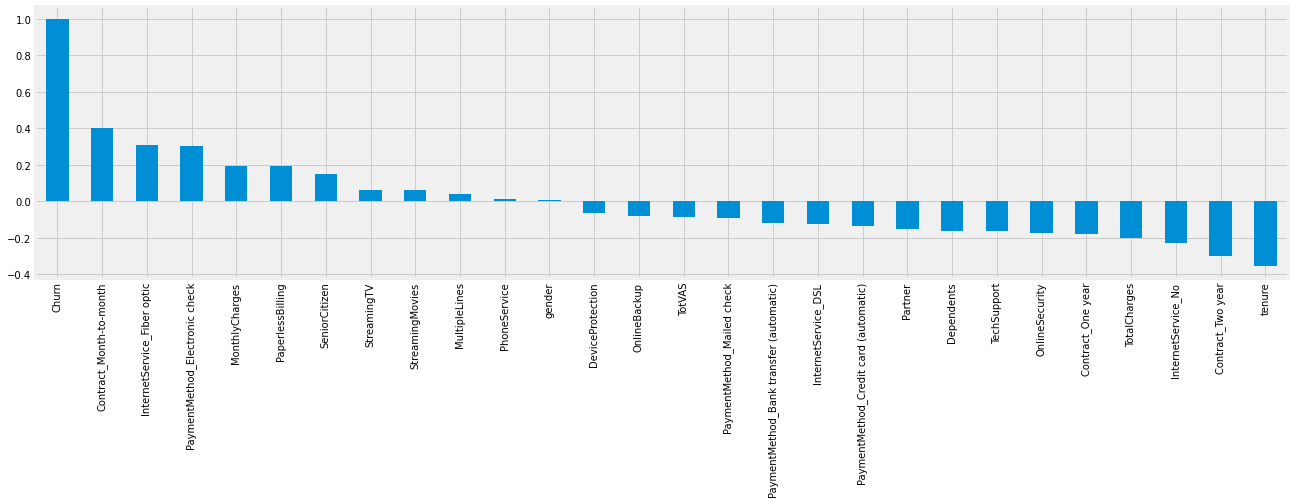

In [465]:
# Show correlation plot for correlation of Churn with each of the remaining features.
plt.figure(figsize=(16,10))
data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

#5: Train Test Split

##5.1 Define X & y variables

In [466]:
X = data.drop(['Churn', 'TotVAS'], axis=1)
y = data['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#6: Model Evaluation Metrics

For performance assessment of the chosen models, various metrics are used:

* Feature weights: Indicates the top features used by the model to generate the predictions
* Confusion matrix: Shows a grid of true and false predictions compared to the actual values
* Accuracy score: Shows the overall accuracy of the model for training set and test set
* ROC Curve: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)
* AUC for ROC: Measures the overall separability between classes of the model related to the ROC curve
Precision-Recall-Curve: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance
* F1 Score: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.
* AUC for PRC: Measures the overall separability between classes of the model related to the Precision-Recall curve

In [467]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

##6.1: Function to plot feature weights for a classifier.

In [468]:
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

##6.2: Function to plot confusion matrix for a classifier and train and test accuracy

In [469]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

##6.3: Function to plot ROC curve and AUC score

In [470]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

##6.4: Function to plot precision-recall-curve (PRC) and the F1 score and AUC score

In [471]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

#7: Model Selection, Traning, Prediction & Assesment

##7.1: Logistic Regression

7.1.1: Model Import

In [472]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression()

7.1.2: Model Fit

In [473]:
model_logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

7.1.3: Model Predict

In [474]:
y_pred_model_logreg = model_logreg.predict(X_test)
y_pred_prob_model_logreg = model_logreg.predict_proba(X_test)

y_pred_model_logreg

array([0, 0, 1, ..., 0, 0, 0])

7.1.4: Plot model evaluators

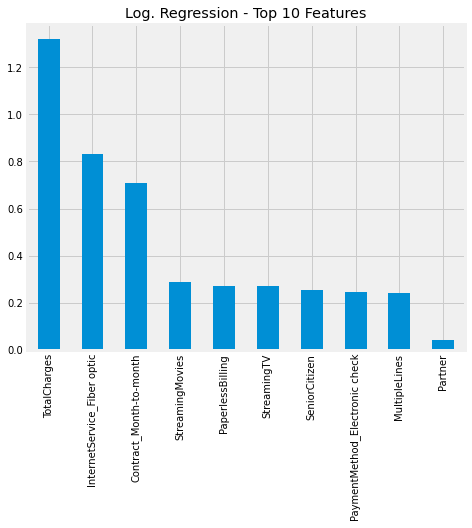

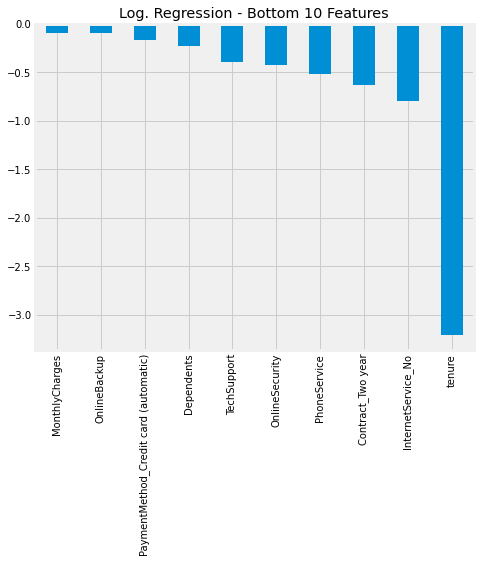

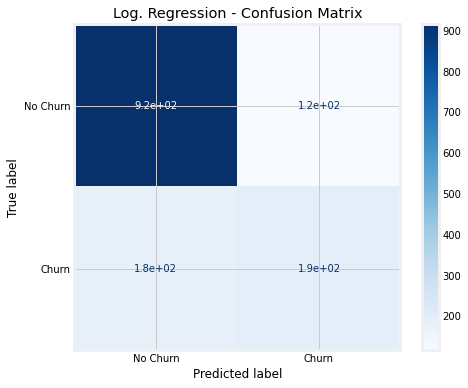

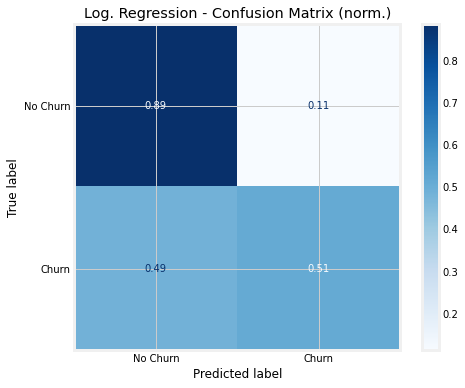

Accuracy Score Test: 0.7874911158493249
Accuracy Score Train: 0.8072888888888888 (as comparison)



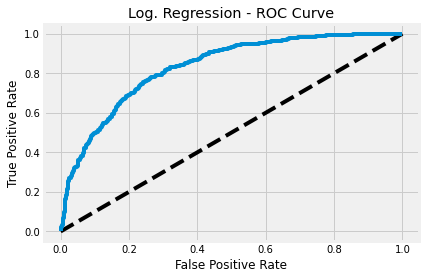

AUC Score (ROC): 0.8316517489685304



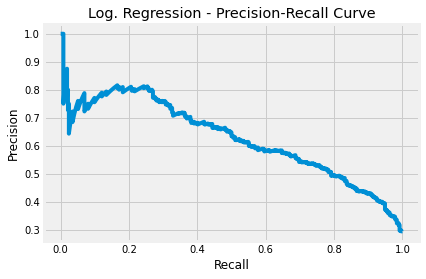

F1 Score: 0.5622254758418741 
AUC Score (PR): 0.627365395614657



In [475]:
feature_weights(X, model_logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, model_logreg, y_pred_model_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_prob_model_logreg, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_model_logreg, y_pred_prob_model_logreg, 'Log. Regression')

#ANN

In [476]:
X_train.shape

(5625, 26)

In [477]:
X_test.shape

(1407, 26)

In [478]:
model_ANN = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),

])

In [479]:
print(model_ANN.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                540       
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
None


In [480]:
model_ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [481]:
model_ANN.fit(X_train, y_train, epochs=10)

Epoch 1/10
176/176 [==============================] - 1s 1ms/step - loss: 0.5441 - accuracy: 0.7145
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.7884
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.7966
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.7996
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8034
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8050
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8043
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4122 - accuracy: 0.8071
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8055
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8073

In [482]:
y_pred_model_ANN = model_ANN.predict(X_test)

y_pred2 = []
for element in y_pred_model_ANN:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [487]:
y_pred_model_ANN[:2]
y_pred2

[]

ValueError: ignored

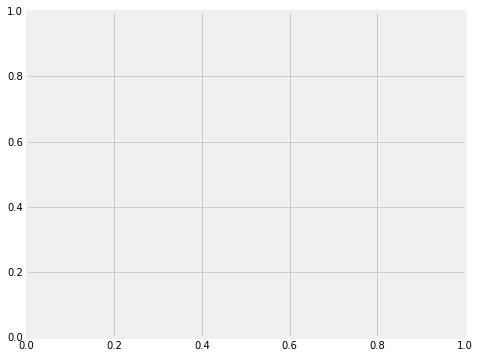

In [484]:
#feature_weights(X, model_ANN, 'Log. Regression1')
confusion_matrix_plot(X_train, y_train, X_test, y_test, model_ANN, y_pred_model_ANN, 'Log. Regression1')
roc_curve_auc_score(X_test, y_test, y_pred_prob_model_logreg, 'Log. Regression1')
precision_recall_curve_and_scores(X_test, y_test, y_pred_model_logreg, y_pred_prob_model_logreg, 'Log. Regression1')

#OLD -> Data Visualisation

In [ ]:
tenure_churn_no = data1[data1.Churn=='No'].tenure
tenure_churn_yes = data1[data1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Telco Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
tenure_churn_no = data1[data1.Churn=='No'].MonthlyCharges
tenure_churn_yes = data1[data1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Telco Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
tenure_churn_no = data1[data1.Churn=='No'].TotalCharges
tenure_churn_yes = data1[data1.Churn=='Yes'].TotalCharges

plt.xlabel("Total Charges")
plt.ylabel("Number Of Customers")
plt.title("Telco Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

#Deep Learning Model Development 

##Data Scaling

In [ ]:
data2.dtypes

In [ ]:
data2.sample(3)

In [ ]:
scale_col = ['tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data2[scale_col] = scaler.fit_transform(data2[scale_col])

In [ ]:
data2.sample(3)

##Define X & Y Variables

In [ ]:
X = data2.drop('Churn', axis=1)
y = data2['Churn']
y

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

##Create Model

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),

])

In [ ]:
print(model.summary())

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20)

##Evaluate Model

In [ ]:
model.evaluate(X_test, y_test)

##Predict Model

In [ ]:
yp = model.predict(X_test)
yp

In [ ]:
y_test[:10]

In [ ]:
ypp = np.argmax(yp, axis=1)
ypp[:10]

In [ ]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')